### 資料參考: TW511教學網
###                  https://zhuanlan.zhihu.com/p/137076292

In [1]:
# 基本資料處理與繪圖套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 紀錄時間與資料格式套件
from datetime import datetime
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p 

In [3]:
# !pip install mlxtend

In [4]:
# !pip install xgboost

In [5]:
# !pip install lightgbm

In [6]:
# 機器學習相關套件
from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [7]:
# 系統套件
import warnings
import os
warnings.filterwarnings('ignore')

In [8]:
# 檢視資料
print(os.listdir('.'))

['archive.zip', 'data_description.txt', 'Kaggle_House_Price_0511.ipynb', 'Kaggle_House_Price_0518.ipynb', 'Kaggle_House_Price_0525.ipynb', 'MobilePrice', 'sample_submission.csv', 'test.csv', 'train.csv']


In [9]:
# 利用pandas讀入資料
df_train = pd.read_csv("train.csv")
print(df_train.shape)

(1460, 81)


In [10]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# df_test = pd.read_csv(r"C:\Users\ccuser\Desktop\test.csv")
df_test = pd.read_csv("test.csv")
df_test.shape

(1459, 80)

In [13]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [15]:
df_sub = pd.read_csv("sample_submission.csv")
df_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# 資料預處理

In [16]:
# 資料切割
# 將Id欄位取出並從DataFrame刪除
# df_train.Id
# df_train["Id"]
df_train_Id = df_train.Id
df_test_Id = df_test.Id

In [17]:
# 刪除欄位 drop()
df_train.drop(['Id'], axis=1, inplace=True)
# df_train = df_train.drop(['Id'], axis=1)
df_test.drop(['Id'], axis=1, inplace=True)

In [18]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [20]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [21]:
# 分出數值型資料與類別型資料
all_cols = df_test.columns.tolist()
all_cols

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [22]:
num_cols = [] # 數值型資料欄位List
cat_cols = [] # 類別型資料欄位List

for col in all_cols:
    if(df_test[col].dtype != 'object'):
        num_cols.append(col)
    else:
        cat_cols.append(col)

In [23]:
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [24]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
len(num_cols)
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

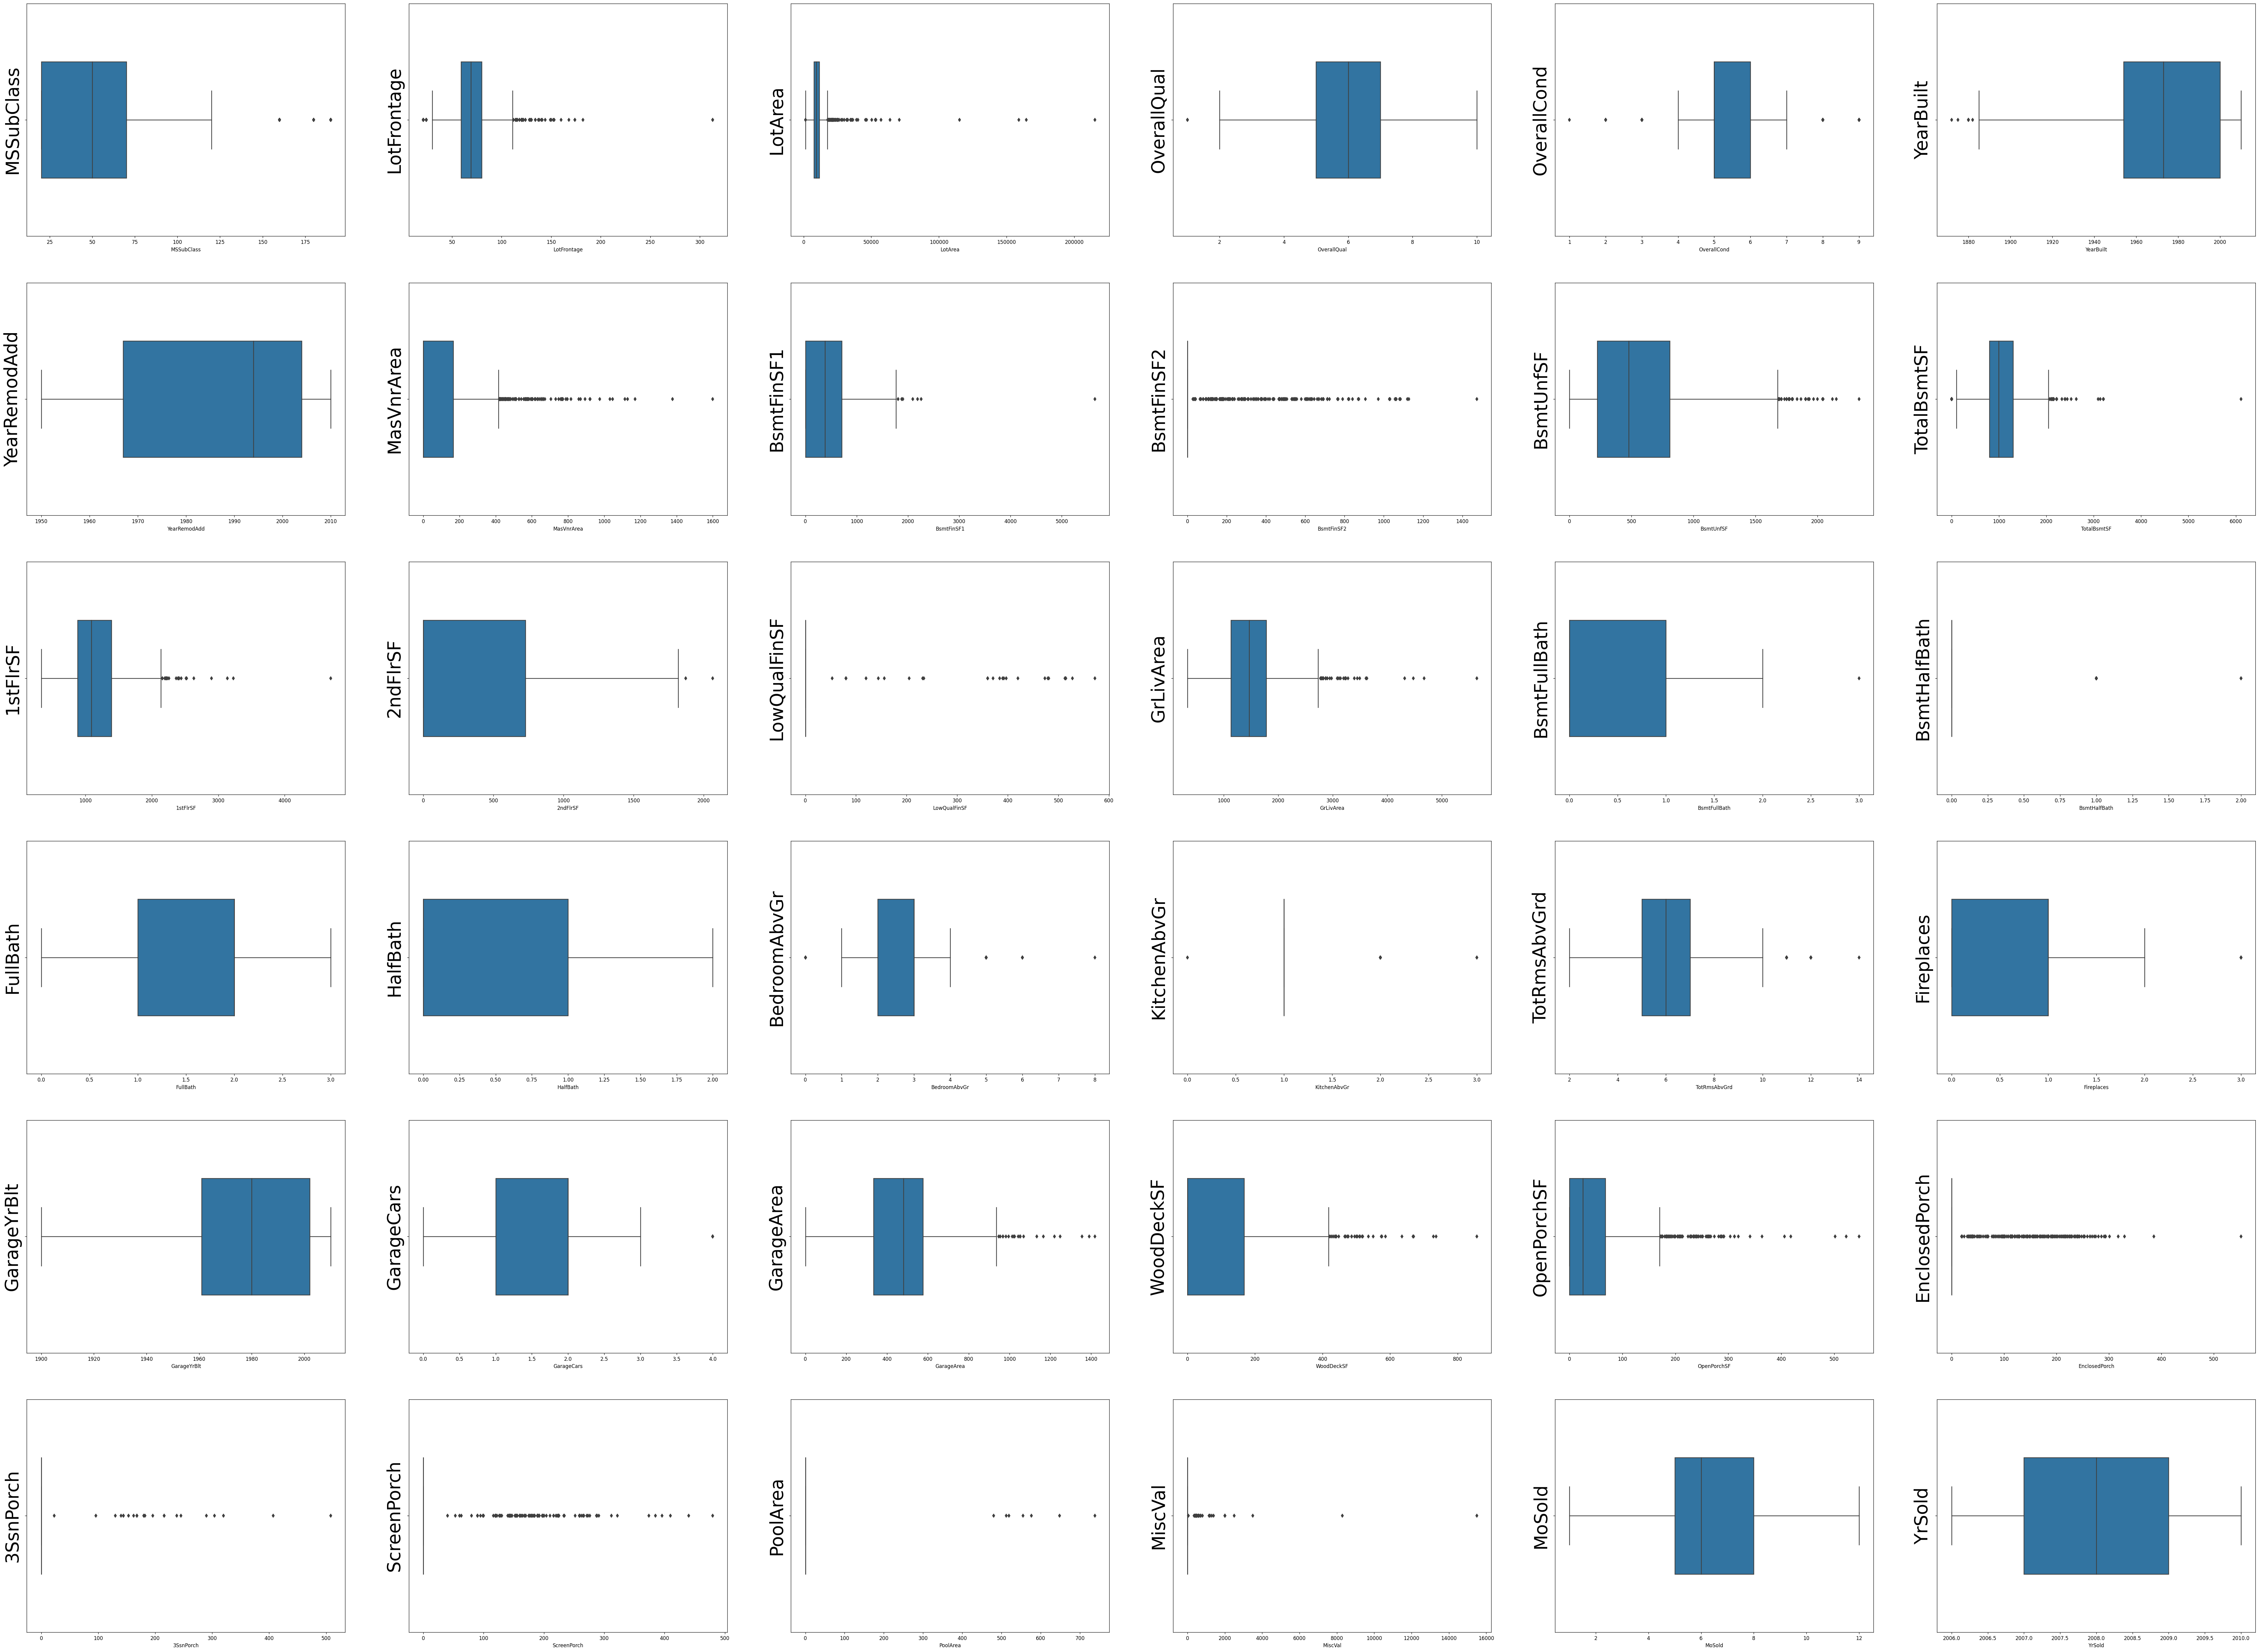

In [26]:
# 繪製圖形
# 新增畫布
fig = plt.figure(figsize=(80, 60), dpi=120)
# i = 0..(36-1)
for i in range(len(num_cols)):
    plt.subplot(6, 6, i+1)
    sns.boxplot(df_train[num_cols[i]], orient='v', width=0.5)
    plt.ylabel(num_cols[i], fontsize=36)
plt.show()

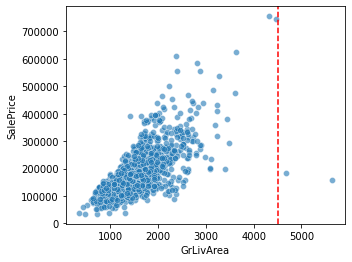

In [27]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train, alpha=0.6)
plt.axvline(x=4500, color='r', linestyle='--')

In [28]:
df_train.GrLivArea.sort_values(ascending=False)[:3]

1298    5642
523     4676
1182    4476
Name: GrLivArea, dtype: int64

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

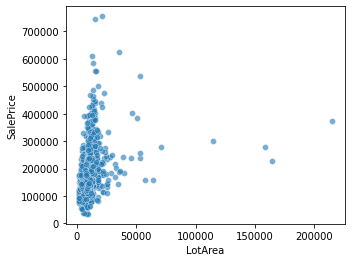

In [29]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='LotArea', y='SalePrice', data=df_train, alpha=0.6)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

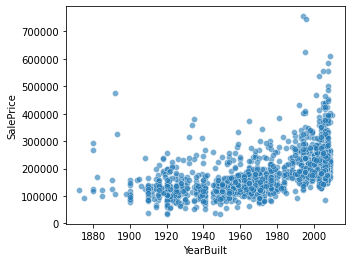

In [30]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df_train, alpha=0.6)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

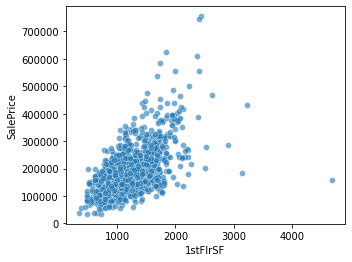

In [31]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='1stFlrSF', y='SalePrice', data=df_train, alpha=0.6)

In [32]:
df_train["1stFlrSF"].sort_values(ascending=False)[:3]

1298    4692
496     3228
523     3138
Name: 1stFlrSF, dtype: int64

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

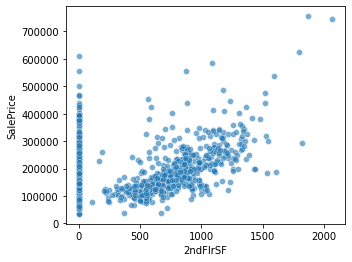

In [33]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='2ndFlrSF', y='SalePrice', data=df_train, alpha=0.6)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

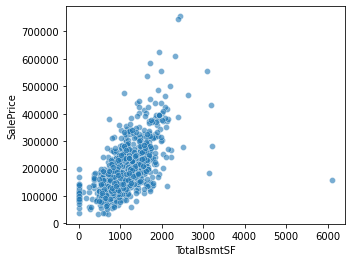

In [34]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df_train, alpha=0.6)

In [35]:
df_train["TotalBsmtSF"].sort_values(ascending=False)[:3]

1298    6110
332     3206
496     3200
Name: TotalBsmtSF, dtype: int64

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

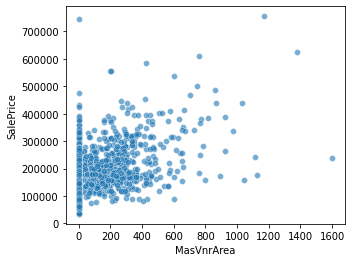

In [36]:
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=df_train, alpha=0.6)

In [37]:
# 異常值刪除
df_train = df_train[df_train["GrLivArea"] < 4500]
# df_train = df_train[df_train.GrLivArea < 4500]
df_train.GrLivArea.sort_values(ascending=False)[:3]

1182    4476
691     4316
1169    3627
Name: GrLivArea, dtype: int64

In [38]:
df_train = df_train[df_train["TotalBsmtSF"] < 4000]
# df_train = df_train[df_train.TotalBsmtSF < 4000]
df_train.TotalBsmtSF.sort_values(ascending=False)[:3]

332    3206
496    3200
440    3094
Name: TotalBsmtSF, dtype: int64

In [39]:
df_train = df_train[df_train["1stFlrSF"] < 3500]
df_train["1stFlrSF"].sort_values(ascending=False)[:3]

496     3228
1024    2898
1373    2633
Name: 1stFlrSF, dtype: int64

In [40]:
df_train.reset_index(drop=True, inplace=True)
df_train.shape

(1458, 80)

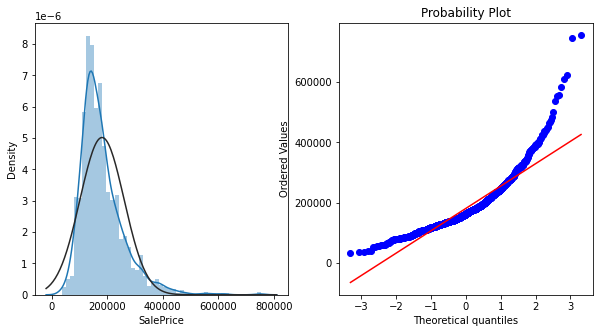

In [41]:
# 對SalePrice繪製長條圖與Q-Q圖(分位圖)，觀察是否符合常態分布
from scipy import stats

plt.figure(figsize=(10, 5))
ax_121 = plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice, fit=stats.norm)

ax_122 = plt.subplot(1,2,2)
res = stats.probplot(df_train.SalePrice, plot=plt)

In [42]:
df_train.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1453    175000
1454    210000
1455    266500
1456    142125
1457    147500
Name: SalePrice, Length: 1458, dtype: int64

In [43]:
# 轉換成對數形式  np.log1p()
df_train.SalePrice = np.log1p(df_train.SalePrice)
df_train.SalePrice

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1453    12.072547
1454    12.254868
1455    12.493133
1456    11.864469
1457    11.901590
Name: SalePrice, Length: 1458, dtype: float64

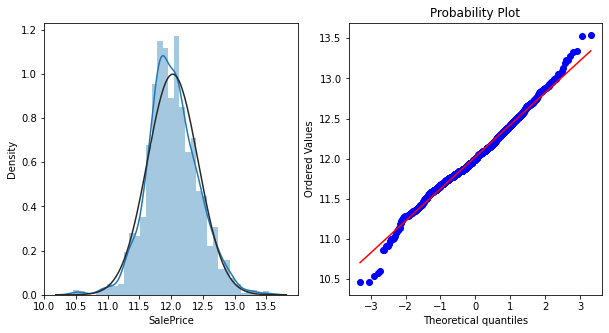

In [44]:
plt.figure(figsize=(10, 5))
ax_121 = plt.subplot(1,2,1)
sns.distplot(df_train.SalePrice, fit=stats.norm)

ax_122 = plt.subplot(1,2,2)
res = stats.probplot(df_train.SalePrice, plot=plt)

In [45]:
# 合併資料進行統一預處理
# 特徵與標籤分離
y = df_train.SalePrice.reset_index(drop=True)
train_X = df_train.drop(["SalePrice"], axis=1)
train_X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [46]:
df_train.SalePrice.reset_index?

Signature:
df_train.SalePrice.reset_index(
    level=None,
    drop=False,
    name=<no_default>,
    inplace=False,
)
Docstring:
Generate a new DataFrame or Series with the index reset.

This is useful when the index needs to be treated as a column, or
when the index is meaningless and needs to be reset to the default
before another operation.

Parameters
----------
level : int, str, tuple, or list, default optional
    For a Series with a MultiIndex, only remove the specified levels
    from the index. Removes all levels by default.
drop : bool, default False
    Just reset the index, without inserting it as a column in
    the new DataFrame.
name : object, optional
    The name to use for the column containing the original Series
    values. Uses ``self.name`` by default. This argument is ignored
    when `drop` is True.
inplace : bool, default False
    Modify the Series in place (do not create a new object).

Returns
-------
Series or DataFrame or None
    When `drop` is False (th

In [47]:
features = pd.concat([train_X, df_test], axis=0).reset_index(drop=True)
features.shape

(2917, 79)

In [48]:
features.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [49]:
# 數值變數中實際為類別變數的特徵欄位(分布並不連續)
transform_cols = []
for col in num_cols:
    if len(features[col].unique()) < 20:
        transform_cols.append(col)
transform_cols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

In [50]:
features.MSSubClass

0        60
1        20
2        60
3        70
4        60
       ... 
2912    160
2913    160
2914     20
2915     85
2916     60
Name: MSSubClass, Length: 2917, dtype: int64

In [51]:
len(features.MSSubClass.unique())

16

In [52]:
features.BsmtFullBath

0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
2912    0.0
2913    0.0
2914    1.0
2915    0.0
2916    0.0
Name: BsmtFullBath, Length: 2917, dtype: float64

In [53]:
features.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
2912    2006
2913    2006
2914    2006
2915    2006
2916    2006
Name: YrSold, Length: 2917, dtype: int64

In [54]:
# MSSubClass、MoSold、YrSold特徵列轉換成string格式
features.MSSubClass = features.MSSubClass.apply(str)
features.MoSold = features.MoSold.apply(str)
features.YrSold = features.YrSold.apply(str)

In [55]:
features.MSSubClass

0        60
1        20
2        60
3        70
4        60
       ... 
2912    160
2913    160
2914     20
2915     85
2916     60
Name: MSSubClass, Length: 2917, dtype: object

In [56]:
num_cols.remove("MSSubClass")
num_cols.remove("MoSold")
num_cols.remove("YrSold")
cat_cols.append("MSSubClass")
cat_cols.append("MoSold")
cat_cols.append("YrSold")

In [57]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   object 
 1   MSZoning       2913 non-null   object 
 2   LotFrontage    2431 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2915 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

In [58]:
# 缺失值處理 - 缺失值會導致模型無法運作，所以必須事先處理
features.isna().sum().sort_values(ascending=False)[:35]

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
SaleType           1
BsmtFinSF1         1
KitchenQual        1
GarageCars         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
Electrical         1
BsmtFinSF2         1
TotRmsAbvGrd       0
dtype: int64

In [59]:
# 處理PoolQC的NA值 -> 沒有游泳池
features.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [60]:
features.PoolQC.fillna("None").unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [61]:
# 統一處理類別型資料的NA問題
features[cat_cols].isna().sum().sort_values(ascending=False)

PoolQC           2908
MiscFeature      2812
Alley            2719
Fence            2346
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Functional          2
Utilities           2
Electrical          1
SaleType            1
Exterior1st         1
KitchenQual         1
Exterior2nd         1
Street              0
LandSlope           0
MoSold              0
MSSubClass          0
SaleCondition       0
ExterQual           0
LotShape            0
LandContour         0
ExterCond           0
PavedDrive          0
LotConfig           0
Neighborhood        0
HouseStyle          0
Condition1          0
Condition2          0
Foundation          0
RoofMatl            0
RoofStyle           0
CentralAir          0
HeatingQC           0
Heating             0
BldgType            0
YrSold    

In [62]:
na_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
           'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
           'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']
for col in na_cols:
    features[col] = features[col].fillna("None")

features[cat_cols].isna().sum().sort_values(ascending=False)

MasVnrType       24
MSZoning          4
Utilities         2
Functional        2
Electrical        1
SaleType          1
KitchenQual       1
Exterior2nd       1
Exterior1st       1
GarageType        0
HeatingQC         0
CentralAir        0
FireplaceQu       0
GarageQual        0
GarageFinish      0
BsmtFinType2      0
GarageCond        0
PavedDrive        0
PoolQC            0
Fence             0
MiscFeature       0
SaleCondition     0
MSSubClass        0
MoSold            0
Heating           0
BsmtExposure      0
BsmtFinType1      0
Street            0
Alley             0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
YrSold            0
dtype: int64

In [63]:
# 眾數
features.SaleType.mode()[0]

'WD'

In [64]:
# 平均值
features.LotArea.mean()

10139.439149811451

In [65]:
# 中位數
features.LotFrontage.median()

68.0

In [66]:
# 缺失值，fillna()填值 - 0、眾數、平均值、中位數
# 其餘沒有NA值的類別型資料，我們以眾數來填補缺失值
# MSZoning: 銷售分區
# MSSubClass: 銷售的住宅類型
no_na_cols = ["MasVnrType", "Functional", "Utilities", "SaleType", "Electrical", "Exterior2nd", "Exterior1st", "KitchenQual"]

for col in no_na_cols:
    features[col] = features[col].fillna(features[col].mode()[0])
    
features[cat_cols].isna().sum().sort_values(ascending=False)

MSZoning         4
GarageFinish     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageQual       0
Street           0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
MSSubClass       0
MoSold           0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
YrSold           0
dtype: int64

In [67]:
features['MSZoning']

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
2912    RM
2913    RM
2914    RL
2915    RL
2916    RL
Name: MSZoning, Length: 2917, dtype: object

# Pandas Grouping
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html <br>
By “group by” we are referring to a process involving one or more of the following steps:
1. Splitting the data into groups based on some criteria
2. Applying a function to each group independently
3. Combining the results into a data structure

In [68]:
# 利用字典創建一個DataFrame
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", np.nan, np.nan, "two", np.nan, "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.028818,-2.091209
1,bar,one,1.310989,-0.316343
2,foo,NaN,-1.607023,-0.557172
3,bar,NaN,-0.281496,-0.157856
4,foo,two,-0.378691,2.079204
5,bar,NaN,0.928268,0.293513
6,foo,one,-1.823900,-0.197960
7,foo,three,-0.887842,0.889690


In [69]:
df.groupby("A").sum()

,C,D
A,,
bar,1.957761,-0.180687
foo,-4.726275,0.122554


In [70]:
# lambda - 匿名的function
# def functionname([參數1, 參數2, ...])
df["B"].transform(lambda x: x.fillna(x.mode()[0]))

0      one
1      one
2      one
3      one
4      two
5      one
6      one
7    three
Name: B, dtype: object

In [71]:
df.B.mode()[0]

'one'

In [72]:
df.groupby("A")["B"].transform(lambda x: x.fillna(x.mode()[0]))

0      one
1      one
2      one
3      one
4      two
5      one
6      one
7    three
Name: B, dtype: object

In [73]:
df.groupby("B").sum()

,C,D
B,,
one,-0.541729,-2.605512
three,-0.887842,0.889690
two,-0.378691,2.079204


In [74]:
# 樞紐分析表
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    1.310989 -0.316343
foo one   -1.852718 -2.289169
    three -0.887842  0.889690
    two   -0.378691  2.079204

In [75]:
# transform and lambda apply
df = pd.DataFrame(
    {
        "A": range(3),
        "B": range(1, 4)
    }
)
df

,A,B
0,0,1
1,1,2
2,2,3


In [76]:
df = df.transform(lambda x: x + 1)
df

,A,B
0,1,2
1,2,3
2,3,4


In [77]:
# MSSubClass(分組) --> MSZoning
features["MSZoning"] = features.groupby("MSSubClass")["MSZoning"].transform(lambda x: x.fillna(x.mode()[0]))

In [78]:
features[cat_cols].isna().sum().sort_values(ascending=False)

MSZoning         0
GarageFinish     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageQual       0
Street           0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
MSSubClass       0
MoSold           0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
YrSold           0
dtype: int64

# 以上將所有類別型欄位的缺失值都填補完成
# 接下來要處理數值型欄位的缺失值

In [79]:
# 缺失狀況
features[num_cols].isna().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
YearRemodAdd       0
TotRmsAbvGrd       0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
OverallQual        0
Fireplaces         0
BedroomAbvGr       0
KitchenAbvGr       0
YearBuilt          0
HalfBath           0
FullBath           0
LotArea            0
OverallCond        0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
MiscVal            0
dtype: int64

In [80]:
features.shape

(2917, 79)

In [81]:
(features[num_cols].isna().sum() / features.shape[0]).sort_values(ascending=False)

LotFrontage      0.166610
GarageYrBlt      0.054508
MasVnrArea       0.007885
BsmtFullBath     0.000686
BsmtHalfBath     0.000686
BsmtFinSF1       0.000343
BsmtFinSF2       0.000343
BsmtUnfSF        0.000343
TotalBsmtSF      0.000343
GarageArea       0.000343
GarageCars       0.000343
YearRemodAdd     0.000000
TotRmsAbvGrd     0.000000
PoolArea         0.000000
ScreenPorch      0.000000
3SsnPorch        0.000000
EnclosedPorch    0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
OverallQual      0.000000
Fireplaces       0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
YearBuilt        0.000000
HalfBath         0.000000
FullBath         0.000000
LotArea          0.000000
OverallCond      0.000000
GrLivArea        0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
MiscVal          0.000000
dtype: float64

In [82]:
num_na_cols = ["GarageYrBlt", "MasVnrArea", "BsmtFullBath", "BsmtHalfBath", 
               "GarageArea", "GarageCars", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]

for col in num_na_cols:
    features[col] = features[col].fillna(0)
    
features[num_cols].isna().sum().sort_values(ascending=False)[:12]

LotFrontage      486
FullBath           0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
GarageYrBlt        0
Fireplaces         0
dtype: int64

In [83]:
# Neighborhood 物理位置(在Ames city城市的位置) 影響LotFrontage，先利用Neighborhood做groupby，再填LotFrontage的中位數
features["LotFrontage"] = features.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
features[num_cols].isna().sum().sort_values(ascending=False)[:12]

LotFrontage      0
FullBath         0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
dtype: int64

In [84]:
features["LotFrontage"] = features["LotFrontage"].transform(lambda x: x.fillna(x.median()))
features[num_cols].isna().sum().sort_values(ascending=False)[:12]

LotFrontage      0
FullBath         0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
dtype: int64

In [85]:
features["LotFrontage"].median()

70.0

In [86]:
features.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
7,60,RL,80.0,10382,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,None,None,None,0,1,2008,WD,Normal


In [87]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   object 
 1   MSZoning       2917 non-null   object 
 2   LotFrontage    2917 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          2917 non-null   object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

# 特徵欄位的合併

In [88]:
# 基於已有特徵進行組合
# 房屋居住總面積  TotalBsmtSF: 地下室總面積  GrLivArea: 地上居住總面積
features["TotalSF"] = features["TotalBsmtSF"] + features["GrLivArea"]
features["TotalSF"].head()

0    2566.0
1    2524.0
2    2706.0
3    2473.0
4    3343.0
Name: TotalSF, dtype: float64

In [89]:
features["TotalBsmtSF"].head()

0     856.0
1    1262.0
2     920.0
3     756.0
4    1145.0
Name: TotalBsmtSF, dtype: float64

In [90]:
features["GrLivArea"].head()

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

In [91]:
# 房屋建築總區域面積  LotFrontage: 房屋到街道之間的距離 LotArea: 建築面積
features["Area"] = features["LotArea"] * features["LotFrontage"]
features["Area"].head()

0     549250.0
1     768000.0
2     765000.0
3     573000.0
4    1197840.0
Name: Area, dtype: float64

In [92]:
# 總衛浴數
features["Total_Bathrooms"] = features["FullBath"] + (0.5 * features["HalfBath"]) + features["BsmtFullBath"] + (0.5 * features["BsmtHalfBath"])
features["Total_Bathrooms"].head()

0    3.5
1    2.5
2    3.5
3    2.0
4    3.5
Name: Total_Bathrooms, dtype: float64

In [93]:
# 門廊總面積
features["Total_PorchSF"] = features["OpenPorchSF"] + features["EnclosedPorch"] + features["3SsnPorch"] + features["ScreenPorch"]
features["Total_PorchSF"].head()

0     61
1      0
2     42
3    307
4     84
Name: Total_PorchSF, dtype: int64

In [94]:
# 將新特徵加到數值欄位中
num_cols.append("TotalSF")
num_cols.append("Area")
num_cols.append("Total_Bathrooms")
num_cols.append("Total_PorchSF")
features.shape

(2917, 83)

In [95]:
len(y)

1458

In [96]:
# features - train + test
# train有 y (SalePrice)，test沒有 y
features.iloc[:len(y), :]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,Area,Total_Bathrooms,Total_PorchSF
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,2,2008,WD,Normal,2566.0,549250.0,3.5,61
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,None,0,5,2007,WD,Normal,2524.0,768000.0,2.5,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,None,0,9,2008,WD,Normal,2706.0,765000.0,3.5,42
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,None,0,2,2006,WD,Abnorml,2473.0,573000.0,2.0,307
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,None,0,12,2008,WD,Normal,3343.0,1197840.0,3.5,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,8,2007,WD,Normal,2600.0,490854.0,2.5,40
1454,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,2,2010,WD,Normal,3615.0,1119875.0,3.0,0
1455,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,Shed,2500,5,2010,WD,Normal,3492.0,596772.0,2.0,60
1456,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,4,2010,WD,Normal,2156.0,660756.0,2.0,112


In [97]:
len(num_cols)

37

<AxesSubplot:>

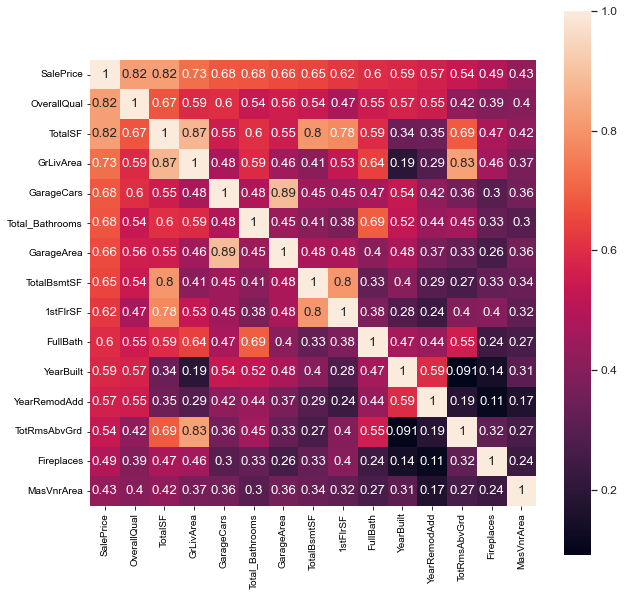

In [98]:
# 繪製熱圖
train_ = features.iloc[:len(y), :]
train_ = pd.concat([train_, y], axis=1)
cols = train_.corr().nlargest(15, "SalePrice").index

plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.1)
sns.heatmap(train_[cols].corr(), square=True, annot=True)

In [99]:
# 由熱圖可知，完工品質和材料、總居住面積、地面上居住面積、車庫容量數、總浴室數目、車庫面積、總地下室面積、第一層面積等
# 都是與房價密切相關的特徵。
train_["OverallQual"].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     16
2       3
1       2
Name: OverallQual, dtype: int64

<AxesSubplot:xlabel='OverallQual'>

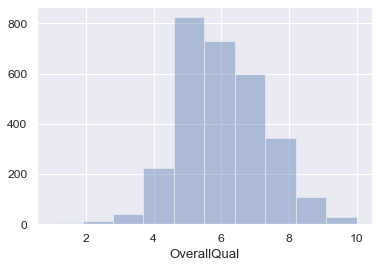

In [100]:
sns.distplot(features['OverallQual'],bins=10,kde=False)

### 分箱 Binning
1. 連續型的特徵資料進行分箱，讓資料有更明確的含義
2. 有效減少資料的過度擬合，測試集的準確才能提升

In [101]:
train_["OverallQual"].head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

In [102]:
def OverallQual_Category(cat):
    if cat <= 4:
        return 1
    elif 4 < cat <= 6:
        return 2
    elif 6 < cat <= 8:
        return 3
    else:
        return 4

features["OverallQual_Cat"] = features["OverallQual"].apply(OverallQual_Category)

In [103]:
features["OverallQual_Cat"].head()

0    3
1    2
2    3
3    3
4    3
Name: OverallQual_Cat, dtype: int64

<AxesSubplot:xlabel='OverallQual_Cat'>

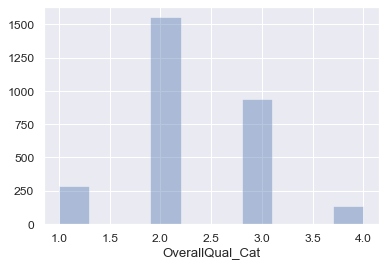

In [104]:
sns.distplot(features["OverallQual_Cat"], bins=10, kde=False)

<AxesSubplot:xlabel='TotalSF'>

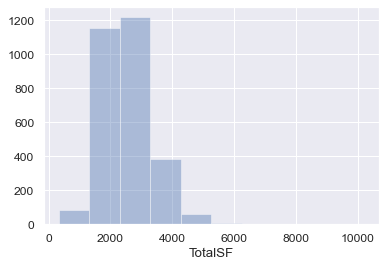

In [105]:
sns.distplot(features["TotalSF"], bins=10, kde=False)

In [106]:
def TotalSF_Category(cat):
    if cat <= 2000:
        return 1
    elif 2000 < cat <= 3000:
        return 2
    elif 3000 < cat <= 4000:
        return 3
    else:
        return 4

features["TotalSF_Cat"] = features["TotalSF"].apply(TotalSF_Category)

In [107]:
features["TotalSF_Cat"].head()

0    2
1    2
2    2
3    2
4    3
Name: TotalSF_Cat, dtype: int64

<AxesSubplot:xlabel='TotalSF_Cat'>

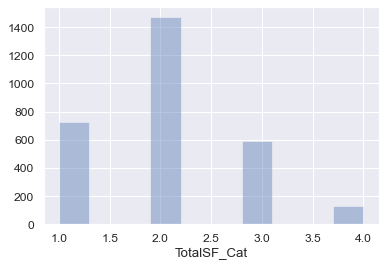

In [108]:
sns.distplot(features["TotalSF_Cat"], bins=10, kde=False)

<AxesSubplot:xlabel='GrLivArea'>

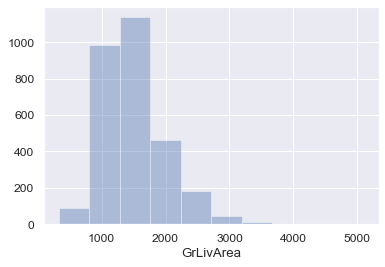

In [109]:
sns.distplot(features["GrLivArea"], bins=10, kde=False)

In [110]:
def GrLivArea_Category(cat):
    if cat <= 1000:
        return 1
    elif 1000 < cat <= 1500:
        return 2
    elif 1500 < cat <= 2000:
        return 3
    else:
        return 4

features["GrLivArea_Cat"] = features["GrLivArea"].apply(GrLivArea_Category)

<AxesSubplot:xlabel='GrLivArea_Cat'>

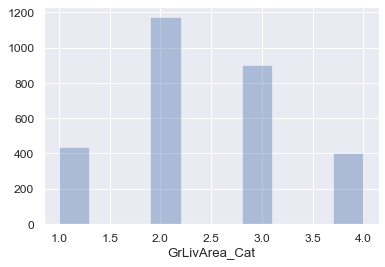

In [111]:
sns.distplot(features["GrLivArea_Cat"], bins=10, kde=False)

<AxesSubplot:xlabel='GarageArea'>

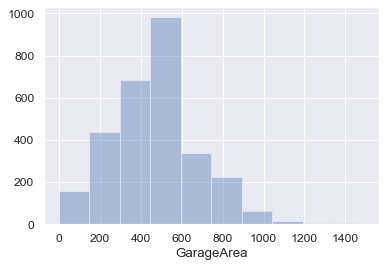

In [112]:
sns.distplot(features["GarageArea"], bins=10, kde=False)

In [113]:
def GarageArea_Category(cat):
    if cat <= 200:
        return 1
    elif 200 < cat <= 400:
        return 2
    elif 400 < cat <= 600:
        return 3
    else:
        return 4

features["GarageArea_Cat"] = features["GarageArea"].apply(GarageArea_Category)

<AxesSubplot:xlabel='GarageArea_Cat'>

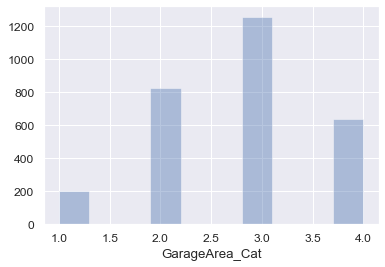

In [114]:
sns.distplot(features["GarageArea_Cat"], bins=10, kde=False)

<AxesSubplot:xlabel='TotalBsmtSF'>

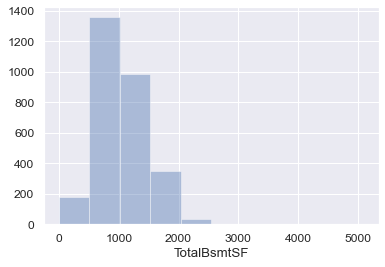

In [115]:
sns.distplot(features["TotalBsmtSF"], bins=10, kde=False)

In [116]:
def TotalBsmtSF_Category(cat):
    if cat <= 600:
        return 1
    elif 600 < cat <= 1000:
        return 2
    elif 1000 < cat <= 1500:
        return 3
    else:
        return 4

features["TotalBsmtSF_Cat"] = features["TotalBsmtSF"].apply(TotalBsmtSF_Category)

<AxesSubplot:xlabel='TotalBsmtSF_Cat'>

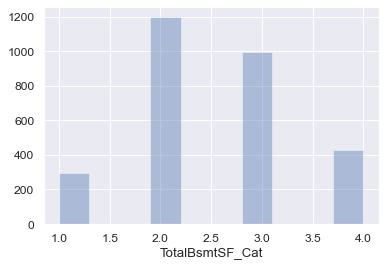

In [117]:
sns.distplot(features["TotalBsmtSF_Cat"], bins=10, kde=False)

<AxesSubplot:xlabel='LotFrontage'>

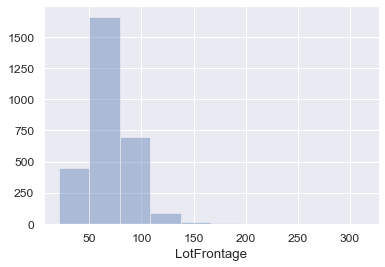

In [118]:
sns.distplot(features["LotFrontage"], bins=10, kde=False)

In [119]:
def LotFrontage_Category(cat):
    if cat <= 50:
        return 1
    elif 50 < cat <= 70:
        return 2
    elif 70 < cat <= 90:
        return 3
    else:
        return 4

features["LotFrontage_Cat"] = features["LotFrontage"].apply(LotFrontage_Category)

<AxesSubplot:xlabel='LotFrontage_Cat'>

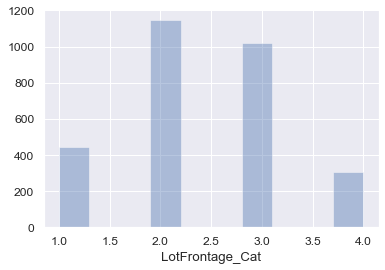

In [120]:
sns.distplot(features["LotFrontage_Cat"], bins=10, kde=False)

In [121]:
# 將建立的分組加入類別型變數中
cat_cols.append('GarageArea_Cat')  
cat_cols.append('GrLivArea_Cat')   
cat_cols.append('TotalBsmtSF_Cat') 
cat_cols.append('TotalSF_Cat') 
cat_cols.append('OverallQual_Cat')   
cat_cols.append('LotFrontage_Cat')

features.shape

(2917, 89)

In [122]:
features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,TotalSF,Area,Total_Bathrooms,Total_PorchSF,OverallQual_Cat,TotalSF_Cat,GrLivArea_Cat,GarageArea_Cat,TotalBsmtSF_Cat,LotFrontage_Cat
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,2566.0,549250.0,3.5,61,3,2,3,3,2,2
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,2524.0,768000.0,2.5,0,2,2,2,3,3,3
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,2706.0,765000.0,3.5,42,3,2,3,4,2,2
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,2473.0,573000.0,2.0,307,3,2,3,4,2,2
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,3343.0,1197840.0,3.5,84,3,3,4,4,3,3


In [123]:
# 數值型變數偏度修正，特徵儘可能轉化為常態分佈狀態
# 繪圖檢視數值型特徵變數的偏度
skew_features = features[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

In [124]:
skew_features

MiscVal            21.939672
Area               18.642721
PoolArea           17.688664
LotArea            13.109495
LowQualFinSF       12.084539
3SsnPorch          11.372080
KitchenAbvGr        4.300550
BsmtFinSF2          4.144503
EnclosedPorch       4.002344
ScreenPorch         3.945101
BsmtHalfBath        3.929996
MasVnrArea          2.621719
OpenPorchSF         2.529358
Total_PorchSF       2.244500
WoodDeckSF          1.844792
1stFlrSF            1.257286
LotFrontage         1.103039
GrLivArea           1.068750
TotalSF             1.011805
BsmtFinSF1          0.980645
BsmtUnfSF           0.919688
2ndFlrSF            0.861556
TotRmsAbvGrd        0.749232
Fireplaces          0.725278
HalfBath            0.696666
TotalBsmtSF         0.671751
BsmtFullBath        0.622415
OverallCond         0.569314
Total_Bathrooms     0.486443
BedroomAbvGr        0.326568
GarageArea          0.216857
OverallQual         0.189591
FullBath            0.165514
GarageCars         -0.219297
YearRemodAdd  

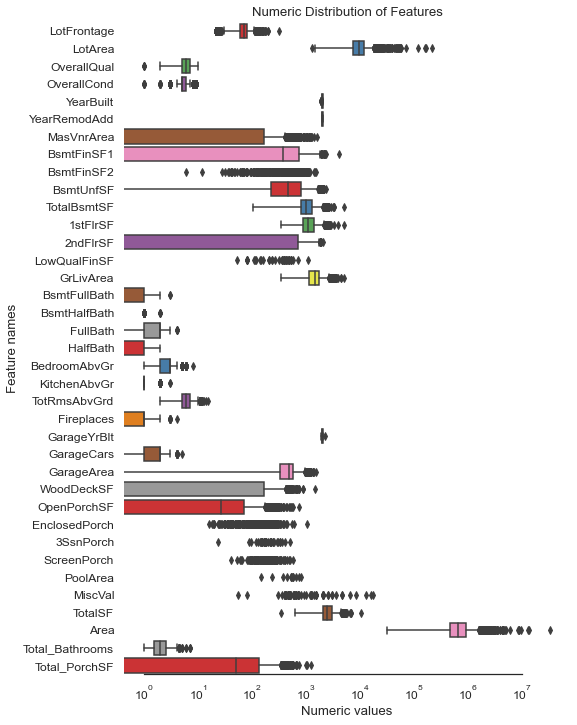

In [125]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 12))
ax.set_xscale("log")
ax = sns.boxplot(data=features[num_cols], orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

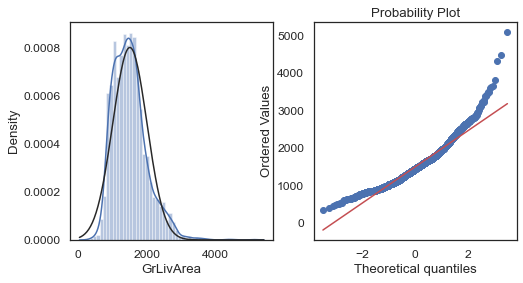

In [126]:
# 繪製直方圖和Q-Q圖，清楚資料分佈結構
plt.figure(figsize=(8,4))
ax_121 = plt.subplot(1,2,1)
sns.distplot(features['GrLivArea'],fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(features['GrLivArea'],plot=plt)

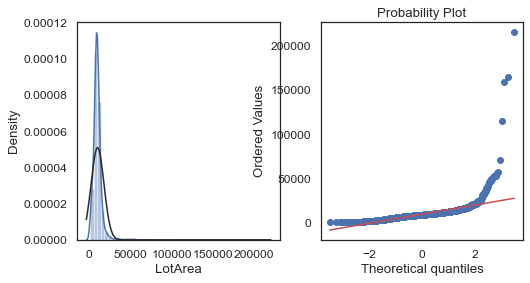

In [127]:
plt.figure(figsize=(8,4))
ax_121 = plt.subplot(1,2,1)
sns.distplot(features['LotArea'],fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(features['LotArea'],plot=plt)

In [128]:
# 以0.5作為閾值，統計偏度超過此數值的中等到高偏度分佈資料列，獲取這些資料列的index
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
high_skew.sort_values(ascending=False)

There are 28 numerical features with Skew > 0.5 :


MiscVal          21.939672
Area             18.642721
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
Total_PorchSF     2.244500
WoodDeckSF        1.844792
1stFlrSF          1.257286
LotFrontage       1.103039
GrLivArea         1.068750
TotalSF           1.011805
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.671751
BsmtFullBath      0.622415
OverallCond       0.569314
dtype: float64

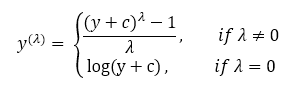

In [129]:
# 對高偏度資料進行處理，將其轉化為正態分佈時，一般使用Box-Cox變換。它可以使資料滿足線性、獨立性、方差齊次以及正態性的同時，又不丟失資訊。
# 使用boxcox_normmax用於找出最佳的λ值
for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

features[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

PoolArea           15.595057
3SsnPorch           8.862045
LowQualFinSF        8.492615
MiscVal             5.237983
BsmtHalfBath        3.779434
KitchenAbvGr        3.778336
ScreenPorch         3.152631
BsmtFinSF2          2.578329
EnclosedPorch       2.149132
MasVnrArea          0.977618
2ndFlrSF            0.895453
WoodDeckSF          0.785550
HalfBath            0.732625
OpenPorchSF         0.621231
BsmtFullBath        0.616643
Fireplaces          0.553135
Total_Bathrooms     0.486443
OverallCond         0.382457
BsmtFinSF1          0.365986
Total_PorchSF       0.355994
BedroomAbvGr        0.326568
TotalBsmtSF         0.297009
GarageArea          0.216857
OverallQual         0.189591
FullBath            0.165514
LotFrontage         0.059189
BsmtUnfSF           0.054195
TotRmsAbvGrd        0.047190
TotalSF             0.027350
GrLivArea           0.008823
Area                0.000000
1stFlrSF           -0.007822
LotArea            -0.138117
GarageCars         -0.219297
YearRemodAdd  

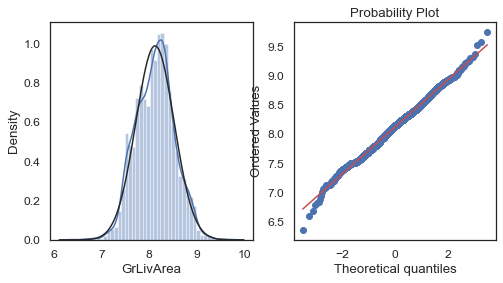

In [130]:
plt.figure(figsize=(8,4))
ax_121 = plt.subplot(1,2,1)
sns.distplot(features['GrLivArea'],fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(features['GrLivArea'],plot=plt)

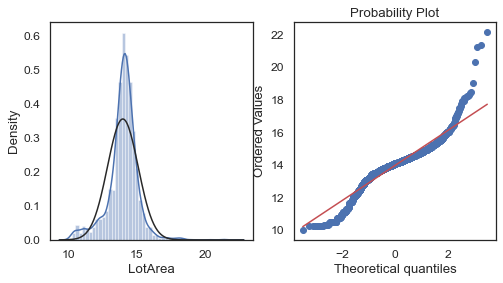

In [131]:
plt.figure(figsize=(8,4))
ax_121 = plt.subplot(1,2,1)
sns.distplot(features['LotArea'],fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(features['LotArea'],plot=plt)

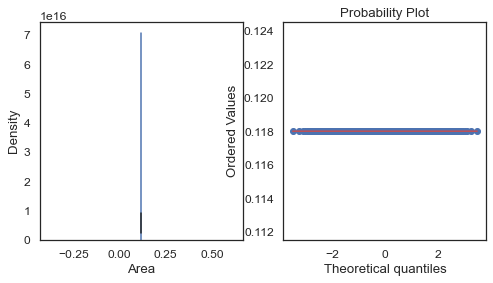

In [132]:
plt.figure(figsize=(8,4))
ax_121 = plt.subplot(1,2,1)
sns.distplot(features['Area'],fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(features['Area'],plot=plt)

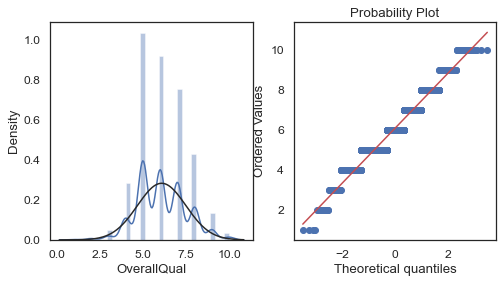

In [133]:
plt.figure(figsize=(8,4))
ax_121 = plt.subplot(1,2,1)
sns.distplot(features['OverallQual'],fit=stats.norm)
ax_122 = plt.subplot(1,2,2)
res = stats.probplot(features['OverallQual'],plot=plt)

In [134]:
# 特徵欄位中，類別型資料會有一些類別值佔據大部分的內容，這樣的特徵可能具有明顯的單一值
# 對於模型訓練沒有太助益，可以刪除
features[cat_cols].describe(include='O').T
# 單一值佔 95%  2771

,count,unique,top,freq
MSZoning,2917,5,RL,2265
Street,2917,2,Pave,2905
Alley,2917,3,None,2719
LotShape,2917,4,Reg,1859
LandContour,2917,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2917,5,Inside,2132
LandSlope,2917,3,Gtl,2776
Neighborhood,2917,25,NAmes,443
Condition1,2917,9,Norm,2511


In [135]:
# > 95% 特徵欄位要刪除
freq_ = features[cat_cols].describe(include='O').T.freq

In [136]:
freq_

MSZoning         2265
Street           2905
Alley            2719
LotShape         1859
LandContour      2622
Utilities        2916
LotConfig        2132
LandSlope        2776
Neighborhood      443
Condition1       2511
Condition2       2888
BldgType         2423
HouseStyle       1471
RoofStyle        2310
RoofMatl         2875
Exterior1st      1026
Exterior2nd      1015
MasVnrType       1766
ExterQual        1798
ExterCond        2536
Foundation       1306
BsmtQual         1283
BsmtCond         2604
BsmtExposure     1904
BsmtFinType1      851
BsmtFinType2     2491
Heating          2872
HeatingQC        1491
CentralAir       2721
Electrical       2670
KitchenQual      1493
Functional       2717
FireplaceQu      1420
GarageType       1722
GarageFinish     1230
GarageQual       2602
GarageCond       2652
PavedDrive       2639
PoolQC           2908
Fence            2346
MiscFeature      2812
SaleType         2526
SaleCondition    2402
MSSubClass       1079
MoSold            503
YrSold    

In [137]:
freq_.index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass', 'MoSold', 'YrSold'],
      dtype='object')

In [138]:
drop_cols = []
for i, num in enumerate(freq_):
    if freq_[i] > 2771:
        drop_cols.append(freq_.index[i])
drop_cols

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'PoolQC',
 'MiscFeature']

In [139]:
# 將drop_cols從features中移除
features = features.drop(drop_cols, axis=1)

In [140]:
# 將drop_cols從cat_cols中移除
for col in drop_cols:
    cat_cols.remove(col)

In [141]:
cat_cols

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'MoSold',
 'YrSold',
 'GarageArea_Cat',
 'GrLivArea_Cat',
 'TotalBsmtSF_Cat',
 'TotalSF_Cat',
 'OverallQual_Cat',
 'LotFrontage_Cat']

In [142]:
features.shape

(2917, 81)

In [143]:
# 新增特徵欄位 HasPool 0: 沒有、1: 有
#                                                               PoolArea > 0 表示有游泳池
features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['HasWoodDeckSF'] = features['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
features['Hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

#檢視當前特徵數
print("經過特徵處理後的特徵維度為 :",features.shape)

經過特徵處理後的特徵維度為 : (2917, 86)


In [144]:
features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,TotalSF_Cat,GrLivArea_Cat,GarageArea_Cat,TotalBsmtSF_Cat,LotFrontage_Cat,HasPool,HasGarage,HasWoodDeckSF,Hasfireplace,HasBsmt
0,60,RL,18.144573,13.833055,None,Reg,Lvl,Inside,CollgCr,Norm,...,2,3,3,2,2,0,1,0,0,1
1,20,RL,20.673626,14.117918,None,Reg,Lvl,FR2,Veenker,Feedr,...,2,2,3,3,3,0,1,1,1,1
2,60,RL,18.668047,14.476513,None,IR1,Lvl,Inside,CollgCr,Norm,...,2,3,4,2,2,0,1,0,1,1
3,70,RL,17.249651,14.106197,None,IR1,Lvl,Corner,Crawfor,Norm,...,2,3,4,2,2,0,1,0,1,1
4,60,RL,21.314283,15.022008,None,IR1,Lvl,FR2,NoRidge,Norm,...,3,4,4,3,3,0,1,1,1,1


### 特徵編碼
1. 類別型資料，一般採用One-hot encoding
2. 對於彼此有數量關聯的特徵，一般採用labelencoder

<!-- 
A: apple, Orange, Banana
    1       2        3
one-hot:
    A1      A2      A3
    1       0       0
    0       1       0
    0       0       1
    增加資料維度 
    -->

In [145]:
# 使用pd.get_dummies()
final_features = pd.get_dummies(features,columns=cat_cols).reset_index(drop=True)
print("經過onehot編碼後的特徵維度為 :", final_features.shape)

經過onehot編碼後的特徵維度為 : (2917, 327)


In [146]:
# 訓練集 & 測試集資料還原
X_train = final_features.iloc[:len(y), :]
X_test = final_features.iloc[len(y):, :]
print("訓練集特徵維度為：", X_train.shape)
print("測試集特徵維度為：", X_test.shape)

訓練集特徵維度為： (1458, 327)
測試集特徵維度為： (1459, 327)


### 迴歸模型異常值檢測
標準分數可藉由以下公式求出：
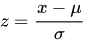


除了根據視覺化的異常值篩查以外，使用模型對資料進行擬合，然後設定一個殘差閾值（y_true - y_pred) 也能從另一個角度找出可能潛在的異常值。

In [147]:
# 定義迴歸模型找出異常值並繪圖的函數
def find_outliers(model, X, y, sigma=4):
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    except:
        model.fit(X, y)  # 模型可能尚未訓練，先丟去訓練
        y_pred = pd.Series(model.predict(X), index=y.index)
    
    # 計算模型預測y值與真實y值之間的殘差(residual)
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    
    # 計算異常值定義的引數z,資料的|z|大於σ將會被視為異常
    # 標準分數（Standard Score，又稱z-score，中文稱為Z-分數或標準化值）
    z = (resid - mean_resid) / std_resid
    outliers = z[abs(z) > sigma].index
    
    # 列印結果並繪製影象
    # R平方(R squared)，判定係數(coefficient of determination)，衡量回歸模型表現的指標，代表從獨立變數X可以解釋依變數Y變異的比例
    print('R2 = ', model.score(X,y))  # 越大越好
    # 均方誤差(Mean-Square Error)，各測量值誤差的平方和取平均值的平方根（均方根誤差的平方），評價數據的變化程度
    print('MSE = ', mean_squared_error(y, y_pred))
    # 均方根誤差(Root Mean-Square Error)，衡量預測值和實際值之間的平均差異，藉此估計預測模型預測目標值的準確度
    print('RMSE = ', np.sqrt(mean_squared_error(y, y_pred)))  # 越小越好
    print('------------------------------------------')
    
    print('mean of residuals', mean_resid)
    print('std of residuals', std_resid)
    print('------------------------------------------')
    
    print(f'find {len(outliers)}','outliers：')
    print(outliers.tolist())
    
    plt.figure(figsize=(15, 5))
    ax_131 = plt.subplot(1, 3, 1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers], y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('y')
    plt.ylabel('y_pred');
    
    ax_132 = plt.subplot(1, 3, 2)
    plt.plot(y, y-y_pred, '.')
    plt.plot(y.loc[outliers], y.loc[outliers] - y_pred.loc[outliers], 'ro')
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');
    
    ax_133 = plt.subplot(1, 3, 3)
    z.plot.hist(bins=50, ax=ax_133)
    z.loc[outliers].plot.hist(color='r', bins=30, ax=ax_133)
    plt.legend(['Accepted','Outliers'])
    plt.xlabel('z')
    
    return outliers

R2 =  0.9512859484785501
MSE =  0.007777722620028305
RMSE =  0.08819139765321958
------------------------------------------
mean of residuals 1.967638062847328e-15
std of residuals 0.08822165718324133
------------------------------------------
find 13 outliers：
[30, 88, 107, 462, 587, 631, 687, 727, 967, 969, 1322, 1430, 1451]


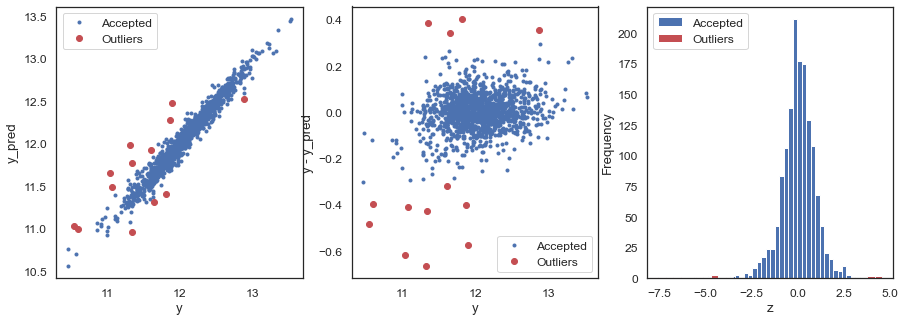

In [148]:
# 使用Linear Regression模型
outliers_lr = find_outliers(LinearRegression(), X_train, y, sigma=3.5)

R2 =  0.8237243253423345
MSE =  0.028144308660961674
RMSE =  0.1677626557400713
------------------------------------------
mean of residuals -4.629736618464302e-16
std of residuals 0.16782021712647607
------------------------------------------
find 10 outliers：
[30, 185, 410, 462, 495, 631, 687, 915, 967, 1243]


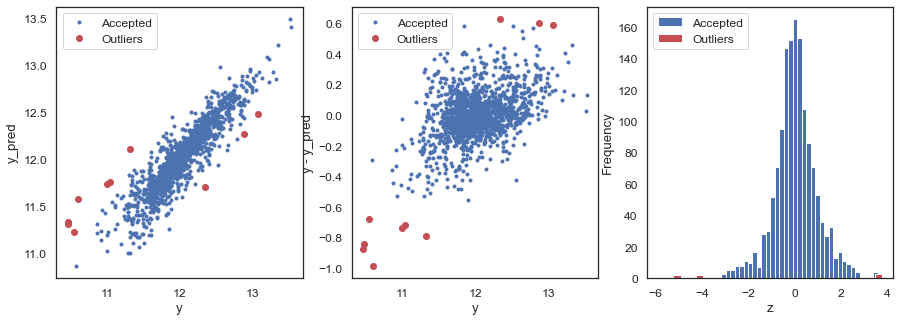

In [149]:
# 使用Elasnet模型
outliers_ent = find_outliers(ElasticNetCV(), X_train, y, sigma=3.5)

### XGBoot(eXtreme Gradient Boosting)
Tree-based<br>
1. Gradient Boosting: 組合一群Weak Leaners，嘗試修改每一次錯誤，找出比較好的方式
2. Overfitting有良好的抵抗性
3. 結合Boosting(序列-相關，像決策樹(主要))及Bagging(抽樣-獨立，像隨機森林)，每一棵樹都互相關聯，後面生成的樹不要犯前面的樹的錯誤
4. 特徵隨機採樣，不會拿全部的特徵來做決策
5. GPU平行運算


R2 =  0.9991033780439572
MSE =  0.000143155345353639
RMSE =  0.011964754295581628
------------------------------------------
mean of residuals -1.3659677184981805e-05
std of residuals 0.01196885174676126
------------------------------------------
find 7 outliers：
[76, 679, 714, 883, 957, 971, 1055]


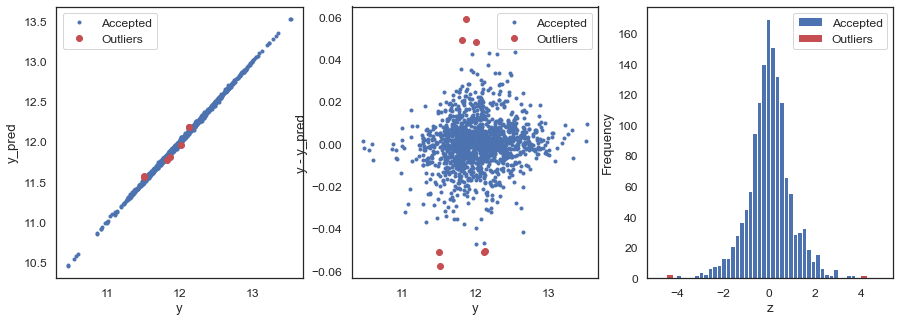

In [150]:
# 使用XGB模型
outliers_xgb = find_outliers(XGBRegressor(), X_train, y, sigma=4)

### LightGBM - GDBT
1. 輕量化
2. 訓練速度較快、占用記憶體較少，結果相對XGB較差
3. 亦有平行運算
與XGB都是使用貪婪的方式最小化

R2 =  0.9896392173100063
MSE =  0.001654210466433482
RMSE =  0.04067198626122755
------------------------------------------
mean of residuals -2.119251382520896e-09
std of residuals 0.04068594130924878
------------------------------------------
find 10 outliers：
[30, 462, 495, 532, 631, 687, 915, 967, 1211, 1322]


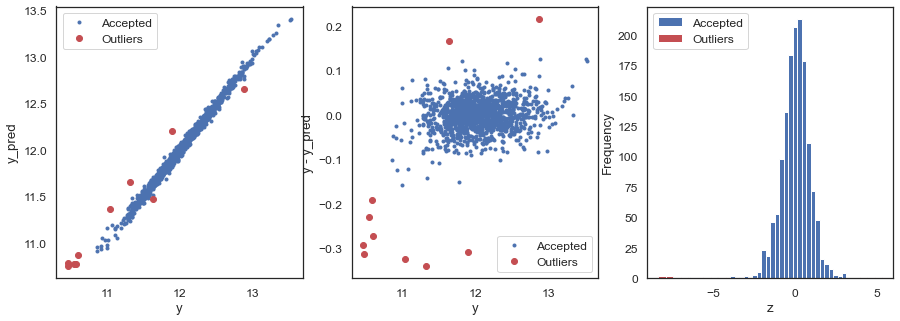

In [151]:
# 使用LGB模型
outliers_lgb = find_outliers(LGBMRegressor(), X_train, y, sigma=4)

R2 =  0.9610186296257542
MSE =  0.006223795324968464
RMSE =  0.0788910345030946
------------------------------------------
mean of residuals 1.4754239592000709e-15
std of residuals 0.07891810296657877
------------------------------------------
find 4 outliers：
[462, 631, 969, 1430]


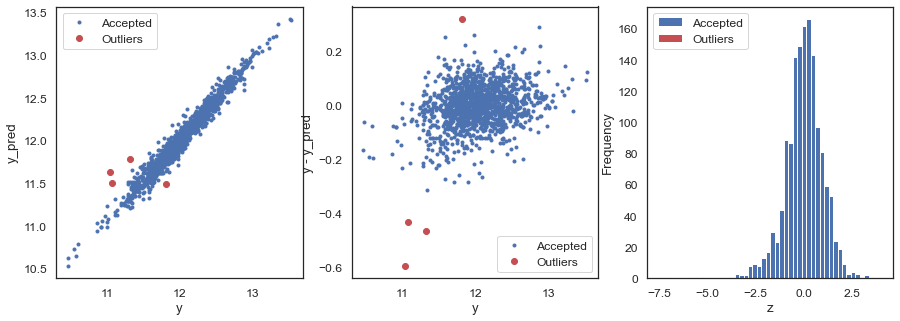

In [152]:
# 使用GBDT模型
outliers_gbdt = find_outliers(GradientBoostingRegressor(), X_train, y, sigma=4)

R2 =  0.7740894562025327
MSE =  0.036069049724241894
RMSE =  0.18991853444106474
------------------------------------------
mean of residuals -0.010768083629732875
std of residuals 0.18967808047633172
------------------------------------------
find 7 outliers：
[30, 410, 495, 631, 915, 967, 1060]


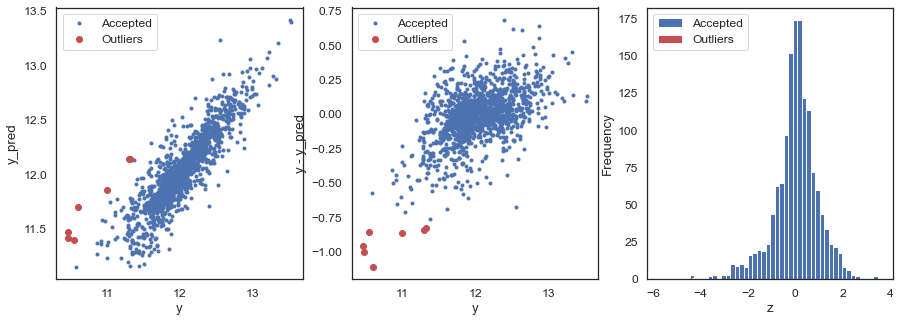

In [153]:
# 使用SVR模型
outliers_svr = find_outliers(SVR(), X_train, y, sigma=4)

In [154]:
# 比較每個模型下的異常值序號，進行人工投票選擇，超過半數即為異常值，這樣最終確定了outliers，並在特徵集和標籤集中刪除。
outliers = [30, 462, 631, 967]
X_train = X_train.drop(X_train.index[outliers])
y = y.drop(y.index[outliers])

### 消除one-hot特徵矩陣的過擬合(Overfitting)
判斷某一列是否將產生過擬合的條件是<br>
特徵矩陣某一列中的某個值出現的次數除以特徵矩陣的列數超過99.95%,即其幾乎在被投影的各個維度上都有著同樣的取值，並不具有「主成分」的性質，則記為過擬合的列。

In [155]:
# 記錄產生過擬合的資料列的序號
overfit = []
for i in X_train.columns:
    counts = X_train[i].value_counts(ascending=False)
    zeros = counts.iloc[0]
    if zeros / len(X_train) * 100 > 99.95:
        overfit.append(i)
        
overfit

['Area', 'MSSubClass_150']

In [156]:
# 對訓練集和測試集同時刪除這些列
X_train = X_train.drop(overfit, axis=1).copy()
X_test = X_test.drop(overfit, axis=1).copy()
print('經過異常值和過擬合刪除後訓練集的特徵維度為：', X_train.shape)
print('經過異常值和過擬合刪除後測試集的特徵維度為：', X_test.shape)

經過異常值和過擬合刪除後訓練集的特徵維度為： (1454, 325)
經過異常值和過擬合刪除後測試集的特徵維度為： (1459, 325)


## 模型訓練與測試

In [157]:
cols

Index(['SalePrice', 'OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars',
       'Total_Bathrooms', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces',
       'MasVnrArea'],
      dtype='object')

In [158]:
train_ = train_[cols]
train_

,SalePrice,OverallQual,TotalSF,GrLivArea,GarageCars,Total_Bathrooms,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,MasVnrArea
0,12.247699,7,2566.0,1710,2.0,3.5,548.0,856.0,856,2,2003,2003,8,0,196.0
1,12.109016,6,2524.0,1262,2.0,2.5,460.0,1262.0,1262,2,1976,1976,6,1,0.0
2,12.317171,7,2706.0,1786,2.0,3.5,608.0,920.0,920,2,2001,2002,6,1,162.0
3,11.849405,7,2473.0,1717,3.0,2.0,642.0,756.0,961,1,1915,1970,7,1,0.0
4,12.429220,8,3343.0,2198,3.0,3.5,836.0,1145.0,1145,2,2000,2000,9,1,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,12.072547,6,2600.0,1647,2.0,2.5,460.0,953.0,953,2,1999,2000,7,1,0.0
1454,12.254868,6,3615.0,2073,2.0,3.0,500.0,1542.0,2073,2,1978,1988,7,2,119.0
1455,12.493133,7,3492.0,2340,1.0,2.0,252.0,1152.0,1188,2,1941,2006,9,2,0.0
1456,11.864469,5,2156.0,1078,1.0,2.0,240.0,1078.0,1078,1,1950,1996,5,0,0.0


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# LinearRegression訓練與評估
# Train data - X_train 80%
#              X_test  20%
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_.drop('SalePrice', axis=1), train_['SalePrice'], test_size=0.3, random_state=42)


In [160]:
y_train1.shape

(1020,)

In [161]:
y_test1.shape

(438,)

In [162]:
y_train1 = y_train1.values.reshape(-1,1)
y_test1 = y_test1.values.reshape(-1,1)


In [163]:
y_train1.shape

(1020, 1)

In [164]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train1 = sc_X.fit_transform(X_train1)
X_test1 = sc_X.fit_transform(X_test1)
y_train1 = sc_y.fit_transform(y_train1)
y_test1 = sc_y.fit_transform(y_test1)

In [165]:
X_train1

array([[ 0.65329954,  0.54680387,  0.33704444, ...,  0.29085461,
         0.58826664,  1.09134292],
       [-0.79847722, -1.21923848, -0.87569338, ..., -0.94527749,
        -0.94634199, -0.11779649],
       [-0.79847722, -0.75285861, -1.03871715, ..., -0.94527749,
        -0.94634199, -0.58285011],
       ...,
       [-0.79847722, -0.59266164, -0.91545528, ..., -0.94527749,
        -0.94634199,  0.3937625 ],
       [-0.79847722, -0.62625133, -0.94130051, ..., -0.32721144,
        -0.94634199, -0.58285011],
       [ 0.65329954,  0.64240528,  0.03485403, ...,  0.29085461,
         0.58826664, -0.58285011]])

In [166]:
lr = LinearRegression()
lr.fit(X_train1, y_train1)
lr.intercept_

array([-6.90599958e-16])

In [167]:
lr.coef_

array([[ 0.2713184 ,  0.15074667,  0.18467013,  0.06154073,  0.14405159,
         0.09113436,  0.05700684,  0.03634395, -0.09405919,  0.11539976,
         0.11989106,  0.01254111,  0.09952526,  0.00495431]])

In [168]:
# 預測數據
lr_y_pred = lr.predict(X_test1)
lr_y_pred = lr_y_pred.reshape(-1,1)

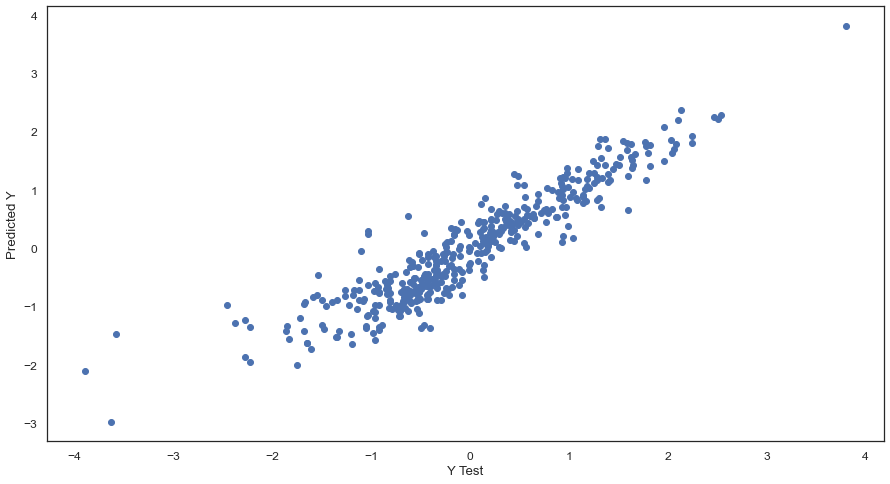

In [169]:
plt.figure(figsize=(15,8))
plt.scatter(y_test1, lr_y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [170]:
from sklearn import metrics

print('平均絕對誤差:', metrics.mean_absolute_error(y_test1, lr_y_pred))
print('均方誤差:', metrics.mean_squared_error(y_test1, lr_y_pred))
print('均方根誤差:', np.sqrt(metrics.mean_squared_error(y_test1, lr_y_pred)))

平均絕對誤差: 0.27464014620382116
均方誤差: 0.14070929124368534
均方根誤差: 0.37511237148844523


### 梯度提升迴歸模型

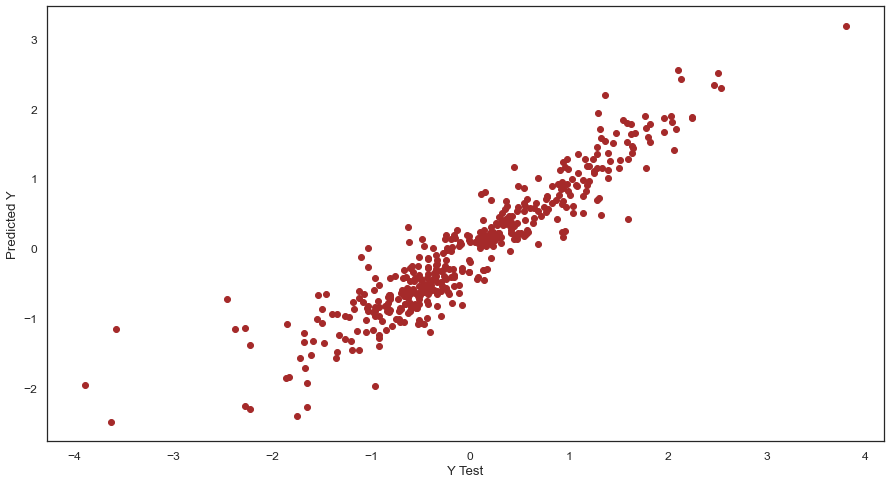

In [171]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

param = {'n_estimators':500, 'max_depth':4, 'min_samples_split':2, 'learning_rate':0.01, 'loss':'ls'}
gbr = ensemble.GradientBoostingRegressor(**param)

gbr.fit(X_train1, y_train1)

# 預測數據
gbr_pred = gbr.predict(X_test1)
gbr_pred = gbr_pred.reshape(-1,1)

plt.figure(figsize=(15,8))
plt.scatter(y_test1, gbr_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [172]:
print('平均絕對誤差:', metrics.mean_absolute_error(y_test1, gbr_pred))
print('均方誤差:', metrics.mean_squared_error(y_test1, gbr_pred))
print('均方根誤差:', np.sqrt(metrics.mean_squared_error(y_test1, gbr_pred)))

平均絕對誤差: 0.25522683332409274
均方誤差: 0.13558304420959272
均方根誤差: 0.3682160292675927


### 決策樹迴歸模型

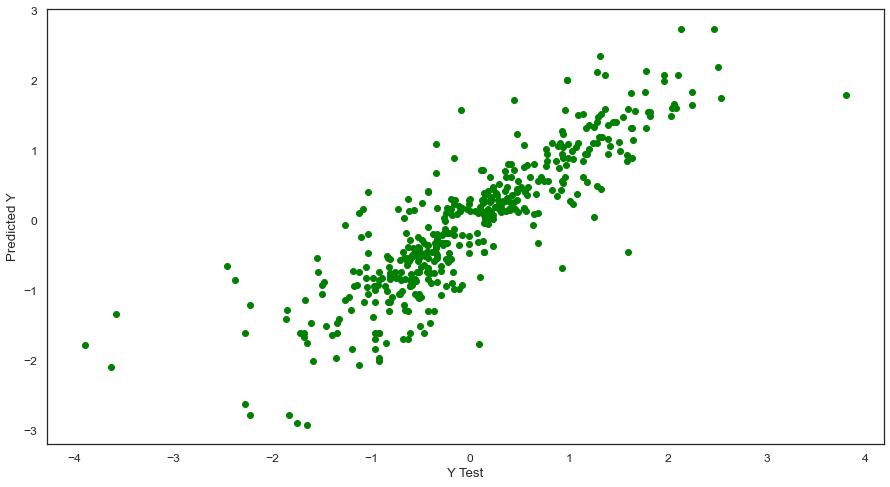

In [173]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train1, y_train1)

# 预测数据
dtr_pred = dtreg.predict(X_test1)
dtr_pred = dtr_pred.reshape(-1,1)

plt.figure(figsize=(15, 8))
plt.scatter(y_test1, dtr_pred, c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [174]:
print('平均絕對誤差:', metrics.mean_absolute_error(y_test1, dtr_pred))
print('均方誤差:', metrics.mean_squared_error(y_test1, dtr_pred))
print('均方根誤差:', np.sqrt(metrics.mean_squared_error(y_test1, dtr_pred)))

平均絕對誤差: 0.3697391791234258
均方誤差: 0.27875073063005024
均方根誤差: 0.5279684939748301


### 支援向量機模型

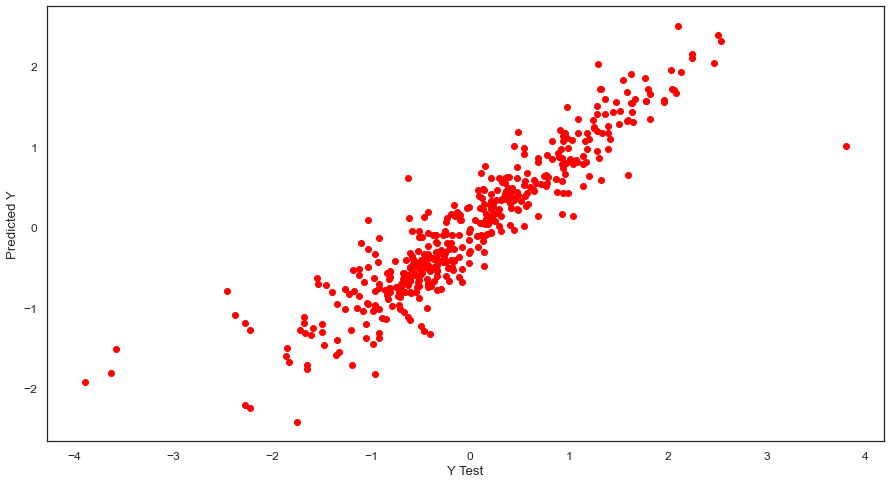

In [175]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train1, y_train1)

# 预测数据
svr_pred = svr.predict(X_test1)
svr_pred= svr_pred.reshape(-1,1)

plt.figure(figsize=(15, 8))
plt.scatter(y_test1, svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [176]:
print('平均絕對誤差:', metrics.mean_absolute_error(y_test1, svr_pred))
print('均方誤差:', metrics.mean_squared_error(y_test1, svr_pred))
print('均方根誤差:', np.sqrt(metrics.mean_squared_error(y_test1, svr_pred)))

平均絕對誤差: 0.26375081396439626
均方誤差: 0.1552172795614117
均方根誤差: 0.39397624238196355


### 隨機森林模型

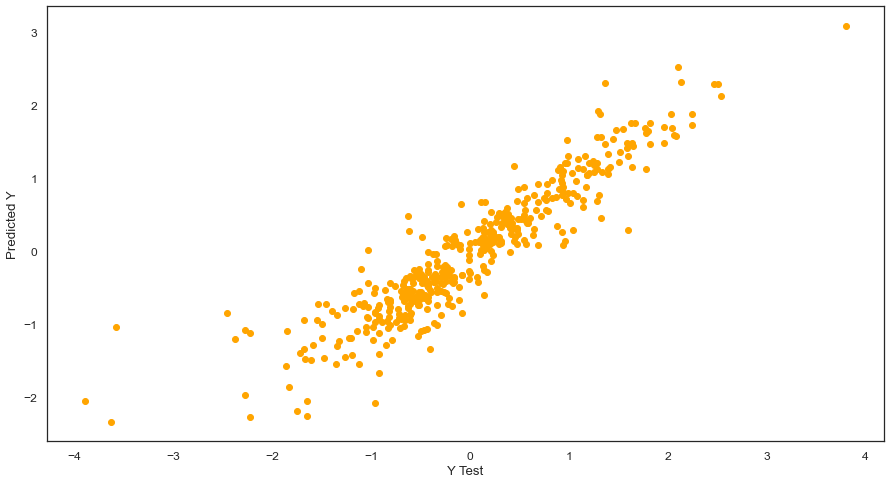

In [177]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfr.fit(X_train1, y_train1)

# 预测
rfr_pred= rfr.predict(X_test1)
rfr_pred = rfr_pred.reshape(-1,1)

# 误差图
plt.figure(figsize=(15, 8))
plt.scatter(y_test1, rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [178]:
print('平均絕對誤差:', metrics.mean_absolute_error(y_test1, rfr_pred))
print('均方誤差:', metrics.mean_squared_error(y_test1, rfr_pred))
print('均方根誤差:', np.sqrt(metrics.mean_squared_error(y_test1, rfr_pred)))

平均絕對誤差: 0.2636563386360209
均方誤差: 0.14546062354044043
均方根誤差: 0.38139300405282794


### LightGBM模型

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


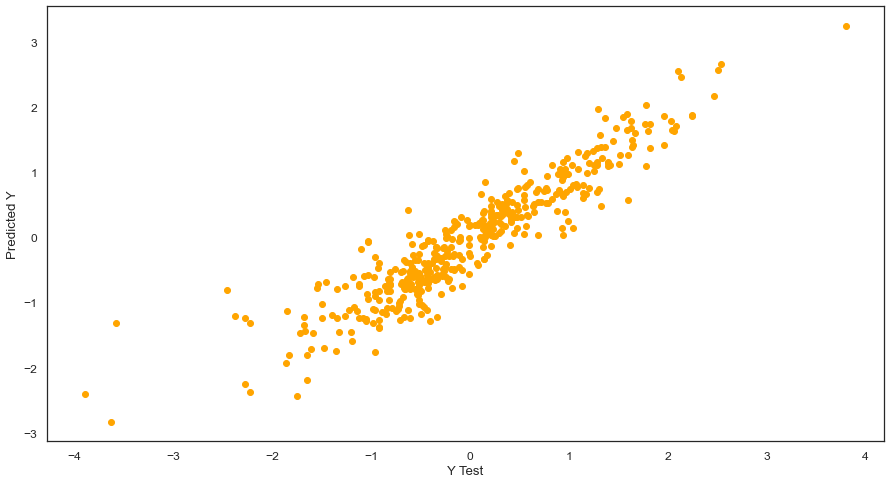

In [179]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.01, n_estimators=3000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(X_train1,y_train1)

lgb_pred = model_lgb.predict(X_test1)
lgb_pred = lgb_pred.reshape(-1,1)

plt.figure(figsize=(15, 8))
plt.scatter(y_test1, lgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [180]:
print('平均絕對誤差:', metrics.mean_absolute_error(y_test1, lgb_pred))
print('均方誤差:', metrics.mean_squared_error(y_test1, lgb_pred))
print('均方根誤差:', np.sqrt(metrics.mean_squared_error(y_test1, lgb_pred)))

平均絕對誤差: 0.2710255160173924
均方誤差: 0.1383735942840763
均方根誤差: 0.3719860135597524


In [181]:
XGBRegressor?

Init signature:
XGBRegressor(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid valu

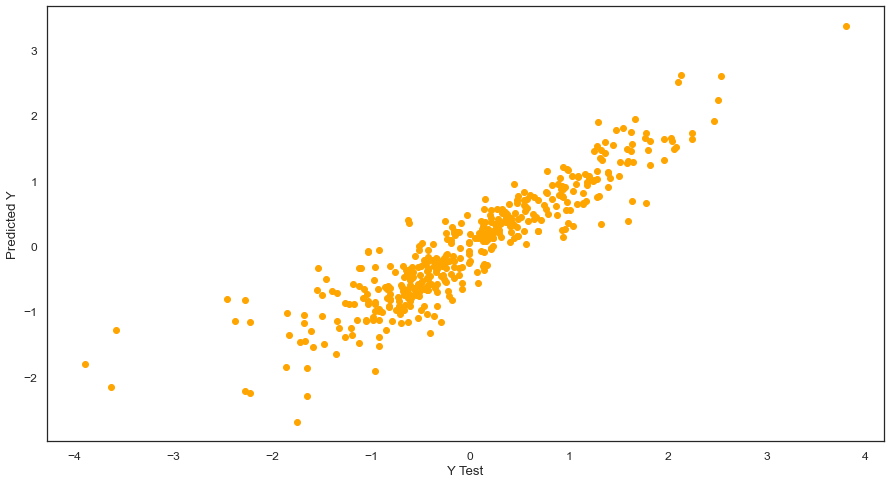

In [182]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4, max_depth=55, learning_rate=0.1, n_estimators=3000)

model_xgb.fit(X_train1,y_train1)

xgb_pred = model_xgb.predict(X_test1)
xgb_pred = xgb_pred.reshape(-1,1)

plt.figure(figsize=(15, 8))
plt.scatter(y_test1, xgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [183]:
print('平均絕對誤差:', metrics.mean_absolute_error(y_test1, lgb_pred))
print('均方誤差:', metrics.mean_squared_error(y_test1, lgb_pred))
print('均方根誤差:', np.sqrt(metrics.mean_squared_error(y_test1, lgb_pred)))

平均絕對誤差: 0.2710255160173924
均方誤差: 0.1383735942840763
均方根誤差: 0.3719860135597524


In [184]:
# 得出梯度提升迴歸模型及LightGBM模型的均方誤差最小
test_file = pd.read_csv("test.csv")
test_id = test_file['Id']
test_index = pd.DataFrame(test_id, columns=['Id'])

In [185]:
X_test = X_test[cols.drop('SalePrice')]
X_test

,OverallQual,TotalSF,GrLivArea,GarageCars,Total_Bathrooms,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,MasVnrArea
1458,5,30.453337,7.551838,1.0,1.0,730.0,433.727241,5.974079,1,1961,1961,1.834659,0.000000,0.000000
1459,6,35.000205,8.038949,1.0,1.5,312.0,621.452892,6.274100,1,1958,1958,1.996577,0.000000,14.642918
1460,5,34.536564,8.292787,2.0,2.5,482.0,453.511628,6.000966,2,1997,1998,1.996577,0.903334,0.000000
1461,6,34.410504,8.273443,2.0,2.5,470.0,452.654004,5.999314,2,1998,1998,2.137369,0.903334,6.157403
1462,8,34.550515,7.992274,2.0,2.0,506.0,601.311083,6.245705,2,1992,1992,1.834659,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,4,29.594748,7.795514,0.0,1.5,0.0,284.720553,5.590761,1,1970,1970,1.834659,0.000000,0.000000
2913,4,29.594748,7.795514,1.0,1.5,286.0,284.720553,5.590761,1,1970,1970,1.996577,0.000000,0.000000
2914,5,34.021921,7.936763,2.0,2.0,576.0,578.174414,6.211838,1,1960,1996,2.137369,0.903334,0.000000
2915,5,31.061644,7.649405,0.0,1.5,0.0,446.644182,6.034830,1,1992,1992,1.996577,0.000000,0.000000


In [186]:
test = sc_X.fit_transform(X_test)
test_prediction_lgbm=model_lgb.predict(test)
test_prediction_lgbm= test_prediction_lgbm.reshape(-1,1)
test_prediction_lgbm =sc_y.inverse_transform(test_prediction_lgbm)
test_prediction_lgbm = pd.DataFrame(test_prediction_lgbm, columns=['SalePrice'])
result = pd.concat([test_index, test_prediction_lgbm], axis=1)
result

,Id,SalePrice
0,1461,11.643192
1,1462,11.810489
2,1463,12.089994
3,1464,12.094099
4,1465,12.184873
...,...,...
1454,2915,11.211147
1455,2916,11.383883
1456,2917,11.963923
1457,2918,11.702191


### Classification 問題
Kaggle Mobile Price Classification

In [187]:
import pandas as pd
df = pd.read_csv("MobilePrice/train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics

In [189]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [190]:
X = df.drop('price_range', axis = 1)
y = df['price_range']

In [191]:
# 分割資料
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state=42)

In [192]:
sgd = SGDClassifier()
sgd.fit(train_X, train_y)

sgd_y_pred = sgd.predict(test_X)
accuracy = metrics.accuracy_score(test_y, sgd_y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6425


In [193]:
confusion = metrics.confusion_matrix(test_y, sgd_y_pred)
print(f"Confusion matrix: \n{confusion}")

Confusion matrix: 
[[93  8  4  0]
 [29 27 20 15]
 [ 0 13 40 39]
 [ 0  4 11 97]]


In [194]:
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())


Normalized confusion matrix:
[0.88571429 0.07619048 0.03809524 0.        ]
[0.31868132 0.2967033  0.21978022 0.16483516]
[0.         0.14130435 0.43478261 0.42391304]
[0.         0.03571429 0.09821429 0.86607143]


In [195]:
gdc = GradientBoostingClassifier()
gdc.fit(train_X, train_y)

gdc_y_pred = gdc.predict(test_X)
accuracy = metrics.accuracy_score(test_y, gdc_y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.905


In [196]:
confusion = metrics.confusion_matrix(test_y, gdc_y_pred)
print(f"Confusion matrix: \n{confusion}")

Confusion matrix: 
[[100   5   0   0]
 [  4  81   6   0]
 [  0   5  80   7]
 [  0   0  11 101]]


            low      mediam      high       very high
col         0          1           2        3   predict class
row  0   0.96190476
     1
     2
     3
true class

recall, precision, f1-score 

In [197]:
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())


Normalized confusion matrix:
[0.95238095 0.04761905 0.         0.        ]
[0.04395604 0.89010989 0.06593407 0.        ]
[0.         0.05434783 0.86956522 0.07608696]
[0.         0.         0.09821429 0.90178571]


In [198]:
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

rfc_y_pred = rfc.predict(test_X)
accuracy = metrics.accuracy_score(test_y, rfc_y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.895


In [199]:
confusion = metrics.confusion_matrix(test_y, rfc_y_pred)
print(f"Confusion matrix: \n{confusion}")

Confusion matrix: 
[[100   5   0   0]
 [  3  82   6   0]
 [  0   7  77   8]
 [  0   0  13  99]]


In [200]:
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())


Normalized confusion matrix:
[0.95238095 0.04761905 0.         0.        ]
[0.03296703 0.9010989  0.06593407 0.        ]
[0.         0.07608696 0.83695652 0.08695652]
[0.         0.         0.11607143 0.88392857]


In [201]:
svc = SVC()
svc.fit(train_X, train_y)

svc_y_pred = svc.predict(test_X)
accuracy = metrics.accuracy_score(test_y, svc_y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.965


In [202]:
confusion = metrics.confusion_matrix(test_y, svc_y_pred)
print(f"Confusion matrix: \n{confusion}")

Confusion matrix: 
[[103   2   0   0]
 [  1  90   0   0]
 [  0   3  87   2]
 [  0   0   6 106]]


In [203]:
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())


Normalized confusion matrix:
[0.98095238 0.01904762 0.         0.        ]
[0.01098901 0.98901099 0.         0.        ]
[0.         0.0326087  0.94565217 0.02173913]
[0.         0.         0.05357143 0.94642857]


row: True class<br>
col: Pred class